<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt


In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
training_data = pd.read_excel('/content/drive/MyDrive/matches.xlsx')

In [198]:
training_data.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [199]:
training_data.shape #размеры загруженной таблицы

(1389, 28)

In [200]:
training_data.info() # вся информация, проверяем наличие пропусков и типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   int64  
 9   ga            1389 non-null   int64  
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In [201]:
#приводим все типы object к numeric
training_data["date"] = pd.to_datetime(training_data["date"])
training_data["year"] = pd.DatetimeIndex(training_data["date"]).year
training_data["month"] = pd.DatetimeIndex(training_data["date"]).month
training_data["day_date"] = pd.DatetimeIndex(training_data["date"]).day
training_data["result"] = (training_data["result"] == "W").astype("int")
training_data["venue"] = training_data["venue"].astype("category").cat.codes
training_data["opponent"] = training_data["opponent"].astype("category").cat.codes
training_data["time"] = training_data["time"].str.replace(":.+", "", regex=True).astype("int")
training_data["comp"] = training_data["comp"].astype("category").cat.codes
training_data["round"] = training_data["round"].astype("category").cat.codes
training_data["day"] = training_data["day"].astype("category").cat.codes
training_data["captain"] = training_data["captain"].astype("category").cat.codes
training_data["formation"] = training_data["formation"].astype("category").cat.codes
training_data["referee"] = training_data["referee"].astype("category").cat.codes
training_data["match report"] = training_data["match report"].astype("category").cat.codes
training_data["team"] = training_data["team"].astype("category").cat.codes


In [202]:
#удалил пустые или не полностью заполненные столбцы
training_data = training_data.drop('notes', axis=1)
training_data = training_data.drop('attendance', axis=1)
training_data = training_data.drop('date', axis=1)
training_data = training_data.drop('comp', axis=1)

In [224]:
training_data.head()

,Unnamed: 0,time,round,day,venue,result,gf,ga,opponent,xg,...,sot,dist,fk,pk,pkatt,season,team,year,month,day_date
0,1,16,0,3,0,0,0,1,18,1.9,...,4.0,16.9,1.0,0.0,0.0,2022,12,2021,8,15
1,2,15,11,2,1,1,5,0,15,2.7,...,4.0,17.3,1.0,0.0,0.0,2022,12,2021,8,21
2,3,12,22,2,1,1,5,0,0,3.8,...,10.0,14.3,0.0,0.0,0.0,2022,12,2021,8,28
3,4,15,32,2,0,1,1,0,10,2.9,...,8.0,14.0,0.0,0.0,0.0,2022,12,2021,9,11
4,6,15,33,2,1,0,0,0,17,1.1,...,1.0,15.7,1.0,0.0,0.0,2022,12,2021,9,18


In [217]:
from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor()
#все равно остались или nan или inf, поэтому убираем еще раз
training_data = training_data[np.isfinite(training_data).all(1)]

train_data = training_data[training_data["year"] < 2022]
test_data = training_data[training_data["year"] >= 2022]
training_values = train_data['result'] # целевая переменная
testing_values = test_data['result']
train_points = train_data.drop('result',axis=1)
test_points = test_data.drop('result',axis=1)

# # train_points = train_points[np.isfinite(train_points).all(1)]
# # print(np.isfinite(training_values).to_string())

# # venue - место встречи
# # opponent - противник
predictors = ["venue", "opponent", "time", "day"]

linear_regression_model.fit(train_points[predictors], training_values)
random_forest_model.fit(train_points[predictors], training_values)

RandomForestRegressor()

In [218]:
test_predictions_linear = linear_regression_model.predict(test_points[predictors])
test_predictions_random_forest = random_forest_model.predict(test_points[predictors])

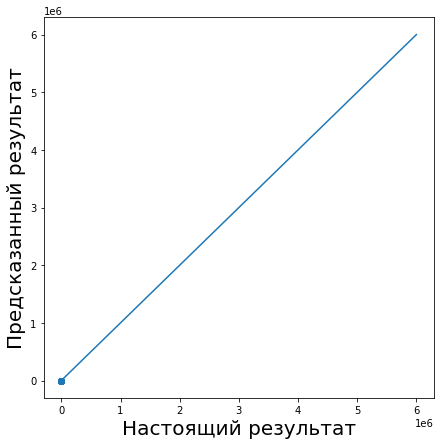

In [219]:
%matplotlib inline 
plt.figure(figsize=(7, 7))
plt.scatter(testing_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящий результат', fontsize=20)
plt.ylabel('Предсказанный результат', fontsize=20);

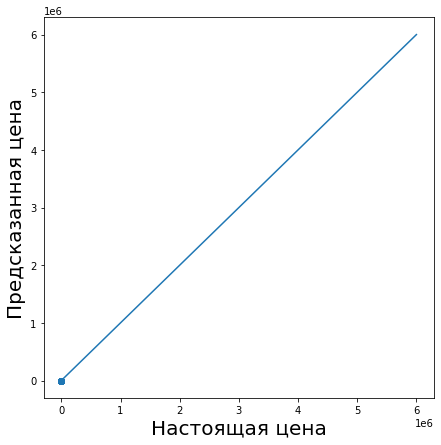

In [220]:
plt.figure(figsize=(7, 7))
plt.scatter(testing_values, test_predictions_random_forest)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [221]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error_linear_model = mean_absolute_error(testing_values, test_predictions_linear) 
mean_squared_error_linear_model = mean_squared_error(testing_values, test_predictions_linear)

mean_absolute_error_random_forest_model = mean_absolute_error(testing_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(testing_values, test_predictions_random_forest)


In [222]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model, 
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2))) 

MAE:    0.47, RMSE:    0.49 для модели линейной регрессии
MAE:    0.44, RMSE:    0.53 для модели случайного леса


In [223]:
combined = pd.DataFrame(dict(actual=testing_values, predicted=test_predictions_random_forest))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0.000000,0.005000,0.010000,0.013190,0.015714,0.018241,0.020000,0.021429,0.022000,0.023333,...,0.880000,0.908500,0.925845,0.932619,0.936000,0.967830,0.975667,0.981000,0.995000,0.996667
actual,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,1,0,3,1,1,1,1,...,0,0,2,1,1,1,1,0,1,0
1,3,0,0,1,1,0,2,0,0,0,...,1,1,2,0,0,0,0,1,1,1
